In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as td
import warnings
warnings.simplefilter("ignore")
import itertools
import warnings
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [2]:
dfin=pd.read_csv('c:/python/china/input.csv',sep=';',decimal=',')
dfin.index=list(map(lambda x: dt.strptime(x[:10],'%d.%m.%Y'),dfin['Unnamed: 0']))
dfin.head()

,Unnamed: 0,Xinjiang,Ninxia,Qinghai,Gansu,Shaanxi,Tibet,Yunnan,Guizhou,Sizhou,...,Jiangsu,Shanghai,Heilongjiang,Jilin,Liaoning,Inner Mongolia,Shanxi,Hebei,Tianjin,Beijing
2019-01-12,12.01.2019 0:00,0.476053,0.818618,0.486680,1.914192,3.716410,0.103291,2.483233,3.326929,5.337220,...,10.864692,6.217528,1.905250,1.895692,2.669987,2.570908,2.724160,11.229192,3.332923,7.665062
2019-01-13,13.01.2019 0:00,0.474498,0.771444,0.481820,1.805490,3.425911,0.110128,2.398637,3.153946,4.978519,...,9.025474,5.819137,1.721315,1.701842,2.343978,2.332508,2.587172,8.329651,2.668496,7.804544
2019-01-14,14.01.2019 0:00,0.493776,0.820433,0.496724,1.897182,3.630064,0.120139,2.493472,3.411526,5.251457,...,9.880088,7.683174,1.885842,1.788901,2.569903,2.564525,2.846243,8.228239,3.266957,11.013440
2019-01-15,15.01.2019 0:00,0.500353,0.804686,0.460631,1.852146,3.563287,0.112007,2.514726,3.455330,5.253628,...,9.203317,6.069654,1.848226,1.727341,2.429644,2.534522,2.843003,7.958866,2.936282,8.218357
2019-01-16,16.01.2019 0:00,0.484866,0.816383,0.529027,2.037377,3.635766,0.113303,2.584775,3.757136,5.660831,...,9.014749,5.775916,1.965190,1.780704,2.630070,2.620285,2.879161,8.111016,2.876634,7.895264


In [3]:
dfin2019=dfin[dfin.index<dt(2020,1,1)][dfin.columns[1:]].sum()
dfin2020=dfin[dfin.index<=dt(2020,1,1)][dfin.columns[1:]].sum()


In [4]:
dfout=pd.read_csv('c:/python/china/output.csv',sep=';',decimal=',')
dfout.index=list(map(lambda x: dt.strptime(x[:10],'%Y-%m-%d'),dfout['Unnamed: 0']))
dfout.head()

,Unnamed: 0,Xinjiang,Ninxia,Qinghai,Gansu,Shaanxi,Tibet,Yunnan,Guizhou,Sizhou,...,Jiangsu,Shanghai,Heilongjiang,Jilin,Liaoning,Inner Mongolia,Shanxi,Hebei,Tianjin,Beijing
2019-01-12,2019-01-12 00:00:00,0.750319,0.890158,0.572735,1.656126,3.268447,0.245171,1.957576,2.483395,4.250912,...,10.719929,8.677822,1.801408,1.990073,2.920082,2.783225,2.857291,8.492429,3.524990,11.216815
2019-01-13,2019-01-13 00:00:00,0.760460,0.803650,0.535345,1.614298,3.002314,0.234155,1.904116,2.324797,3.911814,...,9.857635,6.528827,1.614492,1.814983,2.586686,2.592292,2.559535,8.483292,3.100939,7.707733
2019-01-14,2019-01-14 00:00:00,0.764381,0.822020,0.529870,1.652108,3.212946,0.227092,1.965773,2.357035,4.173865,...,11.170742,6.986542,1.733011,1.825481,2.844558,2.737865,2.706566,11.532650,3.676720,7.903915
2019-01-15,2019-01-15 00:00:00,0.771962,0.790916,0.515938,1.554552,3.117949,0.236520,1.976173,2.326612,4.042030,...,10.407625,6.678547,1.620032,1.660144,2.689006,2.672741,2.634768,9.371020,3.268577,7.789057
2019-01-16,2019-01-16 00:00:00,0.876614,0.866797,0.554623,1.587179,3.342676,0.246208,2.006564,2.355448,4.109195,...,10.490893,6.931332,1.626707,1.719727,2.733750,2.724257,2.671898,9.188640,3.376177,8.292100


In [5]:
dfout2019=dfout[dfout.index<dt(2020,1,1)][dfout.columns[1:]].sum()
dfout2020=dfout[dfout.index<=dt(2020,1,1)][dfout.columns[1:]].sum()


In [6]:
df=pd.read_csv('c:/python/china_regions.csv',sep=';',decimal=',',header=None)
regions=['Beijing','Tianjin','Hebei','Shanxi','Inner-Mongolia','Liaoning','Jilin','Hei Longjiang','Shanghai','Jiangsu',
         'Zhejiang','Anhi','Fujian','Jiangxi','Shandong','Hennan','Hubei','Hunan','Guangdong','Guangxi','Hainan','Chongqing',
         'Sichuan','Guizhou','Yunnan','XiZang-Tibet','Shaanxi','Gansu','Qinghai','Ningxia','Xinjiang']
mas=np.array(df)
mas1=mas[2:31*42+2,2:31*42+2]
mas2=np.sum(mas[2:-41,2:31*42+2],axis=0)
mas3=np.sum(mas[2:31*42+2,2:-2],axis=1)
rrr=np.array([el // 42 for el in range(31*42)])
mas1r=[]
for el1 in range(31):
    mas1r.append([np.sum(mas1[rrr==el1,rrr==el2]) for el2 in range(31)])
mas1r=np.array(mas1r)
mas2r=np.array([np.sum(mas2[rrr==el2]) for el2 in range(31)])
mas4r=np.abs(mas1r-mas1r.T)
mas3r=np.max(mas4r)-mas4r
mas4r1=np.abs(mas1r+mas1r.T)
mas3r1=np.max(mas4r1)-mas4r1


In [7]:
dfi=pd.DataFrame(list(zip(regions,mas2r,np.flip(dfin2019))),columns=['Region','FinansialFlow','MigrationIndex'])
dfi.head()

,Region,FinansialFlow,MigrationIndex
0,Beijing,5.251156e+08,795.406846
1,Tianjin,4.031644e+08,289.436231
2,Hebei,7.785591e+08,756.027367
3,Shanxi,3.040934e+08,253.038913
4,Inner-Mongolia,3.925858e+08,209.978730


In [8]:
m1 = smf.ols('FinansialFlow ~ MigrationIndex - 1',data=dfi)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                                 OLS Regression Results                                
Dep. Variable:          FinansialFlow   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              104.7
Date:                Mon, 16 Mar 2020   Prob (F-statistic):                    2.68e-11
Time:                        22:30:12   Log-Likelihood:                         -647.35
No. Observations:                  31   AIC:                                      1297.
Df Residuals:                      30   BIC:                                      1298.
Df Model:                           1                                                  
Covariance Type:                  HC1                                                  
                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

In [9]:
predictions = fitted.get_prediction(dfi)
p1=fitted.predict(dfi)
p2= predictions.conf_int(alpha=0.1).T[0]
p3= predictions.conf_int(alpha=0.1).T[1]


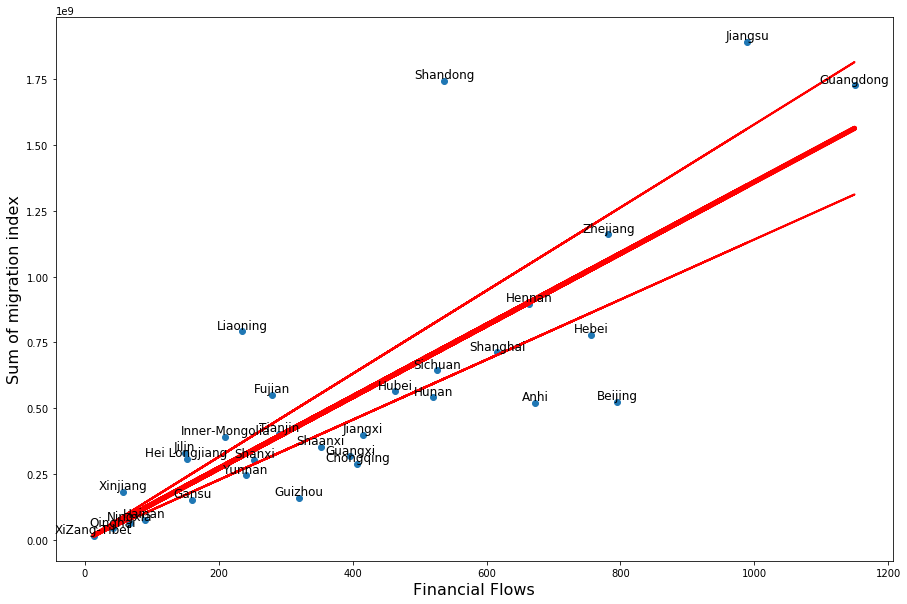

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(np.flip(dfin2019),mas2r)
plt.plot(np.flip(dfin2019),p1,linewidth=5,color='red')
plt.plot(np.flip(dfin2019),p2,linewidth=2,color='red')
plt.plot(np.flip(dfin2019),p3,linewidth=2,color='red')
plt.xlabel('Financial Flows',fontsize=16)
plt.ylabel('Sum of migration index',fontsize=16)
for el in np.array(dfi):
    plt.text(el[2],el[1]+1e7,el[0],
                 horizontalalignment='center',fontsize=12)

plt.show()

# Делаем вывод, что минимальная связь между финансовыми потоками и мигразионным индексом 1.099147e+06. 
По Хубею можно сделать вывод, что блокирование миграционных потоков практически полностью блокирует производство

Смоделируем ситуацию, что время карантина в провинции Хубей составит 6 месяцев (половину производства, в т.ч. четверть потребления). Это приведет к сокращению производства в соответствующих пропорциях. Все потоки в Хубей будут перенаправлены в другие регионы. Вопрос, на сколько сократятся объемы производства в других регионах?

In [11]:
mas1

array([[2.64590666e+05, 1.50716770e+02, 3.07210000e-01, ...,
        2.21070000e-01, 5.85000000e-02, 0.00000000e+00],
       [2.68281779e+04, 4.61715908e+06, 0.00000000e+00, ...,
        1.11574680e+02, 5.79349000e+00, 2.50803500e+01],
       [0.00000000e+00, 0.00000000e+00, 1.48030000e-01, ...,
        2.78500000e-02, 6.30000000e-04, 2.73000000e-03],
       ...,
       [1.00000000e-03, 0.00000000e+00, 0.00000000e+00, ...,
        6.81465310e+02, 0.00000000e+00, 6.28456024e+03],
       [8.38400000e-02, 6.70000000e-03, 2.93000000e-03, ...,
        1.08219268e+03, 1.02624002e+03, 1.78024625e+03],
       [4.01690000e-01, 1.58000000e-03, 6.72000000e-03, ...,
        6.24972990e+02, 4.03240290e+02, 1.52134338e+05]])

In [12]:
rrr=np.array([el % 42 for el in range(31*42)])
mas1i=[]
for el1 in range(42):
    mas1i.append([np.sum(mas1[rrr==el1,rrr==el2]) for el2 in range(42)])
mas1i=np.array(mas1i)
mas1i

array([[1.08007013e+08, 1.13093811e+06, 7.78225749e+03, ...,
        7.92793734e+04, 1.53338904e+05, 4.81865082e+04],
       [7.38624363e+05, 5.12150572e+07, 1.71322366e+05, ...,
        1.47715556e+05, 3.20804038e+04, 1.70385410e+05],
       [5.53750394e+04, 2.26163632e+05, 5.13295336e+06, ...,
        1.69316963e+04, 1.08271029e+04, 1.71157818e+04],
       ...,
       [5.67105695e+05, 1.01232472e+05, 3.61272481e+03, ...,
        1.95648760e+06, 4.51033553e+04, 5.08107463e+05],
       [7.26896655e+04, 2.72759211e+05, 1.44066524e+04, ...,
        1.02903660e+05, 2.85158823e+06, 2.74633961e+06],
       [3.84037053e+06, 5.00476616e+04, 2.78182587e+04, ...,
        1.13683411e+05, 7.42016208e+04, 3.96196114e+06]])

In [13]:
industries=['Agri','CoalM','OilgasM','MetM','NMetM','Food','Tex','Cloth','Wood','Paper','Fuel','Chemi','NonMetP','MetSm',
            'MetInd','General','Special','TransEq','Electri','ComEq','Instr','OtherM','Waste','EquiRepair','ElectriH','GasPS',
            'WaterPS','Building','WhSR','Trans','Accom','Inform','Fin','Estate','Rental','Science','Cons','ResS','Edu',
            'Health','Culture','PublA']

ddf=pd.DataFrame(mas1i,columns=industries)
ddf.index=industries
ddf[ddf.columns[:15]].head(31)

,Agri,CoalM,OilgasM,MetM,NMetM,Food,Tex,Cloth,Wood,Paper,Fuel,Chemi,NonMetP,MetSm,MetInd
Agri,1.080070e+08,1.130938e+06,7.782257e+03,1.333815e+05,2.642960e+05,2.326938e+08,3.852831e+07,7.502142e+06,2.114455e+07,6.441958e+06,4.299100e+04,2.500741e+07,7.932093e+04,2.801036e+05,1.094564e+05
CoalM,7.386244e+05,5.121506e+07,1.713224e+05,7.976802e+05,1.223971e+06,1.644833e+06,4.607956e+05,1.477244e+05,3.286574e+05,9.136556e+05,2.011433e+07,1.400217e+07,1.344386e+07,1.647461e+07,4.652042e+05
OilgasM,5.537504e+04,2.261636e+05,5.132953e+06,8.543284e+04,2.279571e+05,1.461879e+05,5.328477e+04,1.130985e+04,1.092436e+04,3.921102e+04,3.838863e+07,3.047811e+06,7.749982e+05,9.973279e+05,2.085012e+05
MetM,8.188470e+00,1.584080e+05,1.307028e+03,3.693877e+07,3.947143e+05,2.056435e+03,3.440430e+00,0.000000e+00,3.726494e+02,3.404398e+04,1.206060e+05,2.543534e+06,2.274566e+06,1.037331e+08,1.753822e+06
NMetM,7.068091e+04,2.556494e+06,1.102463e+06,1.271535e+06,4.147393e+06,2.245631e+05,2.955347e+03,9.934156e+03,1.786829e+04,1.154615e+06,1.628289e+04,7.618063e+06,2.713302e+07,2.044284e+06,2.024753e+05
Food,9.469938e+07,6.170340e+05,3.652278e+04,3.404894e+05,8.908137e+04,2.524920e+08,6.252584e+05,6.451813e+06,5.085989e+05,1.892028e+06,3.609714e+05,2.245421e+07,7.409937e+05,5.263087e+05,3.015480e+05
Tex,2.219577e+05,3.049631e+05,1.625152e+04,1.555021e+05,2.791327e+05,6.882342e+05,1.286924e+08,8.484479e+07,1.837795e+06,1.099352e+07,1.746417e+05,1.094569e+07,2.498298e+06,6.411963e+05,6.429860e+05
Cloth,4.622204e+05,5.457375e+05,1.668925e+05,4.115178e+05,3.702338e+05,7.334726e+05,3.427704e+06,5.651390e+07,2.931791e+06,1.880710e+06,1.203532e+05,3.170642e+06,1.899142e+06,1.142276e+06,1.357353e+06
Wood,7.200643e+05,5.614392e+05,3.488445e+04,9.818353e+05,2.337470e+05,3.274550e+05,4.172242e+05,2.036474e+05,5.412981e+07,3.909073e+06,1.139221e+05,1.102723e+06,1.646977e+06,7.691051e+05,1.365399e+06
Paper,7.140286e+05,2.574981e+05,6.802687e+04,4.976667e+05,3.337426e+05,9.338674e+06,1.525545e+06,3.410095e+06,2.194683e+06,6.776953e+07,1.502831e+05,1.095765e+07,5.289624e+06,1.342374e+06,2.590619e+06


In [84]:
mas11=mas1.copy()

In [85]:
np.sum(mas1)

10341535167.668417

In [86]:
 for i in range(len(mas11)):
        for j in range(len(mas11)):
            if i%42==16:
                mas11[i,j]= mas11[i,j]*0.75
            elif j%42==16:
                mas11[i,j]= mas11[i,j]*0.75

In [87]:
np.sum(mas11)

10262688131.9792

In [88]:
mas12=mas1-mas11
mas13=np.zeros(len(industries))
for i in range(len(mas11)):
        for j in range(len(mas11)):
            if (i%42==16) & (j%42!=16) & (mas12[i,j]>0):
                mas13[i//42]+=mas12[i,j]

In [89]:
np.sum(mas12)

78847035.68922004

In [90]:
np.sum(mas13)

22107803.007220015

In [91]:
for i in range(len(mas11)):
        for j in range(len(mas11)):
            if (i%42!=16) & (mas12[i,j]>0):
                tt=j//42
                if mas13[tt]>0:
                    if mas12[i,j]<mas13[tt]:
                        mas11[i,j]+=mas12[i,j]
                        mas13[tt]-=mas12[i,j]
                        mas12[i,j]=0
                    else:
                        mas11[i,j]+=mas13[tt]
                        mas12[i,j]-=mas13[tt]
                        mas13[tt]=0
np.sum(mas13)


2497.82042000001

In [92]:
np.sum(mas11)

10284793437.165989

# Сценарий 1. Хубей падает на 25% и непоставляет продукцию в другие регионы. Недопоставка распределяется пропорционально между всеми провинциями.Провинции из-за недостатка ресурса недопроизводят продукцию и также пропорционально недопоставляют результат и т.д.


In [93]:
aa=[1]
aa.append(np.sum(mas11)/np.sum(mas1))

In [94]:
for el in range(300):
    mas14=np.ones(len(mas11))
    for i in range(len(mas11)):
        if np.sum(mas1[:,i])>0:
            mas14[i]=np.sum(mas11[:,i])/np.sum(mas1[:,i])
        else:
            mas14[i]=0
    for i in range(len(mas11)):
        for j in range(len(mas11)):
            tyu=mas14[i]*mas1[i,j]
            if tyu<mas11[i,j]:
                mas11[i,j]=tyu
    aa.append(np.sum(mas11)/np.sum(mas1))

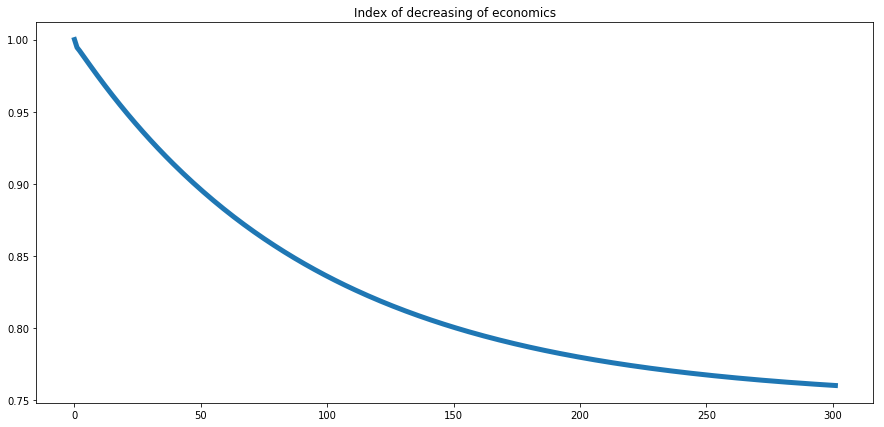

In [95]:
plt.figure(figsize=(15,7))
plt.plot(range(len(aa)),aa,linewidth=5)
plt.title('Index of decreasing of economics')
plt.show()

In [96]:
rrr=np.array([el // 42 for el in range(31*42)])
mas1r=[]
mas11r=[]
for el1 in range(31):
    mas1r.append([np.sum(mas1[rrr==el1,rrr==el2]) for el2 in range(31)])
    mas11r.append([np.sum(mas11[rrr==el1,rrr==el2]) for el2 in range(31)])
mas1r=np.array(mas1r)
mas11r=np.array(mas11r)
mas12r=mas11r/mas1r
res=np.array(sorted(list(zip(regions,np.sum(mas11r,axis=0)/np.sum(mas1r,axis=0))),key=lambda x: x[1]))

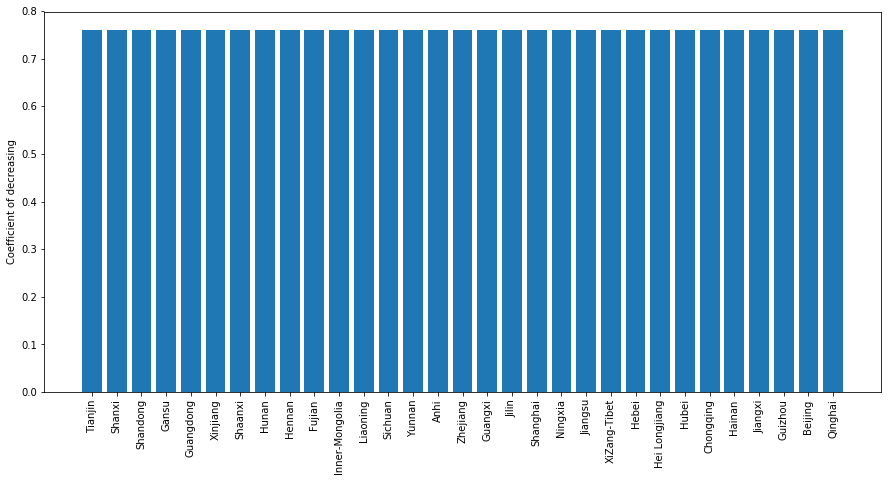

In [97]:
plt.figure(figsize=(15,7))
plt.bar(range(len(res)),np.double(res.T[1]))
plt.ylabel('Coefficient of decreasing')
plt.xticks(range(len(res)),res.T[0],rotation=90)
plt.show()

# Вывод: по такому сценарию все провинции также упадут на 25%

# Сценарий 2: продукция будет недоставляться сначала по самым маленьким долям. Контракты по крупным суммам будут максимально долго сохраняться

In [98]:
mas11=mas1.copy()
for i in range(len(mas11)):
        for j in range(len(mas11)):
            if i%42==16:
                mas11[i,j]= mas11[i,j]*0.75
            elif j%42==16:
                mas11[i,j]= mas11[i,j]*0.75
mas12=mas1-mas11
mas13=np.zeros(len(industries))
for i in range(len(mas11)):
        for j in range(len(mas11)):
            if (i%42==16) & (j%42!=16) & (mas12[i,j]>0):
                mas13[i//42]+=mas12[i,j]
for i in range(len(mas11)):
        for j in range(len(mas11)):
            if (i%42!=16) & (mas12[i,j]>0):
                tt=j//42
                if mas13[tt]>0:
                    if mas12[i,j]<mas13[tt]:
                        mas11[i,j]+=mas12[i,j]
                        mas13[tt]-=mas12[i,j]
                        mas12[i,j]=0
                    else:
                        mas11[i,j]+=mas13[tt]
                        mas12[i,j]-=mas13[tt]
                        mas13[tt]=0

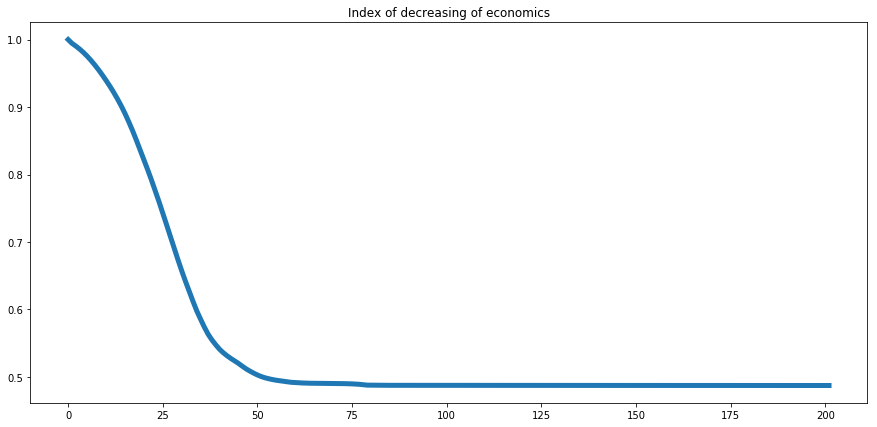

In [99]:
aa=[1]
aa.append(np.sum(mas11)/np.sum(mas1))
mas112=mas1.copy()
mas111=mas11.copy()
for el in range(200):
    mas14=np.zeros(len(mas111))
    for i in range(len(mas111)):
        if np.sum(mas1[:,i])>0:
            mas14[i]=np.sum(mas112[i])-np.sum(mas111[:,i])/np.sum(mas112[:,i])*np.sum(mas112[i])
        else:
            mas14[i]=0
    mas113=mas111.copy()
    rrr=np.array(list(range(len(mas111))))
    i=1
    for i in range(len(mas111)):
        while (mas14[i]>0) & (np.max(mas113[i])>0):
            ttt=np.min(mas113[i][mas113[i]>0])
            tt1=rrr[mas113[i]>0][np.argmin(mas113[i][mas113[i]>0])]
            if mas14[i]>ttt:
                mas14[i]-=ttt
                mas113[i,tt1]=0
            else:
                mas113[i,tt1]-=mas14[i]
                mas14[i]=0
    aa.append(np.sum(mas113)/np.sum(mas1))
    #print(np.sum(mas111),np.sum(mas113))
    mas112=mas111
    mas111=mas113
plt.figure(figsize=(15,7))
plt.plot(range(len(aa)),aa,linewidth=5)
plt.title('Index of decreasing of economics')
plt.show()

In [67]:
rrr=np.array([el // 42 for el in range(31*42)])
mas1r=[]
mas11r=[]
for el1 in range(31):
    mas1r.append([np.sum(mas1[rrr==el1,rrr==el2]) for el2 in range(31)])
    mas11r.append([np.sum(mas113[rrr==el1,rrr==el2]) for el2 in range(31)])
mas1r=np.array(mas1r)
mas11r=np.array(mas11r)
mas12r=mas11r/mas1r

In [77]:
res=np.array(sorted(list(zip(regions,np.sum(mas11r,axis=0)/np.sum(mas1r,axis=0))),key=lambda x: x[1]))

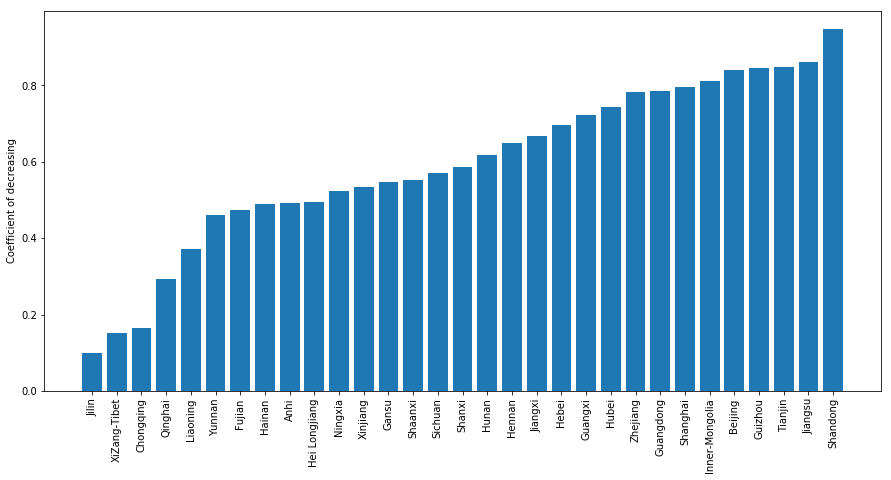

In [83]:
plt.figure(figsize=(15,7))
plt.bar(range(len(res)),np.double(res.T[1]))
plt.ylabel('Coefficient of decreasing')
plt.xticks(range(len(res)),res.T[0],rotation=90)
plt.show()

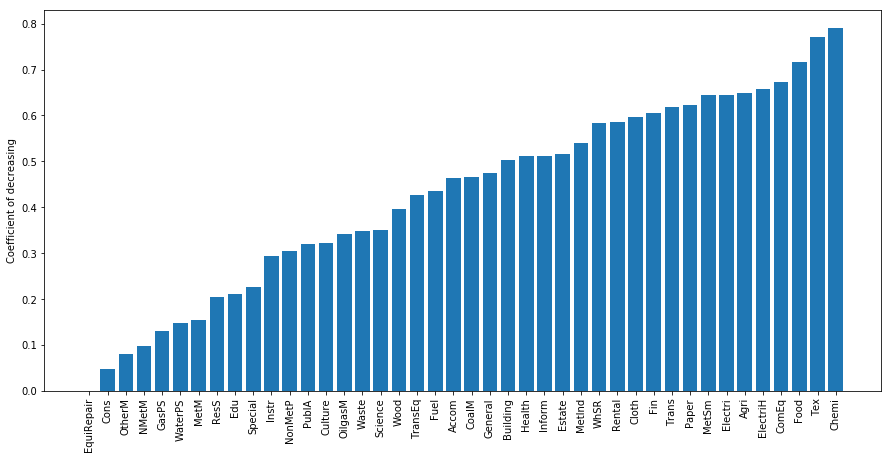

In [100]:
rrr=np.array([el % 42 for el in range(31*42)])
mas1r=[]
mas11r=[]
for el1 in range(42):
    mas1r.append([np.sum(mas1[rrr==el1,rrr==el2]) for el2 in range(42)])
    mas11r.append([np.sum(mas113[rrr==el1,rrr==el2]) for el2 in range(42)])
mas1r=np.array(mas1r)
mas11r=np.array(mas11r)
mas12r=mas11r/mas1r
res=np.array(sorted(list(zip(industries,np.sum(mas11r,axis=0)/np.sum(mas1r,axis=0))),key=lambda x: x[1]))
plt.figure(figsize=(15,7))
plt.bar(range(len(res)),np.double(res.T[1]))
plt.ylabel('Coefficient of decreasing')
plt.xticks(range(len(res)),res.T[0],rotation=90)
plt.show()

# Вывод: пострадают не равномерно. Скорее всего больше всего пострадают слаборазвитые регионы

# Сценарий 3: сокращение пойдет менее всего пострадавших от короновируса регионов

In [114]:
dfg=pd.read_csv('C:/python/china/coronovirus2.csv',sep=';',decimal=',')
dfg.head()

,Province,P,UR,EP/P,UL/P,HD/GDP,PT/P,TR,WAR,HW,...,EC/P,ERE/GDP,TE/GDP,TIEPC,PGR_GDP,Illness,Died,Proc_D,X,Y
0,Beijing,2170.50,1.39,0.607077,0.251573,1.250074,27.123243,29.0,0.130952,18.18,...,3.147201,5.340996,1.583143,10364.829150,26.1,410.0,8.0,0.019512,620,326
1,Tianjin,1546.95,3.50,0.336650,0.332868,1.437183,11.273797,11.9,0.040000,24.38,...,5.272361,5.104664,1.542237,675.870641,16.8,136.0,3.0,0.022059,633,364
2,Hebei,7424.92,3.60,0.510469,0.042259,2.743783,6.737177,7.2,0.068732,189.82,...,4.972611,1.093032,3.241833,301.890329,12.3,318.0,6.0,0.018868,607,384
3,Shanxi,3664.12,3.51,0.454428,0.008351,2.678120,6.865223,8.1,0.106276,70.86,...,5.564628,1.973154,4.593526,493.047849,17.1,133.0,0.0,0.000000,568,400
4,Inner Mongolia,2511.04,3.65,0.471789,0.194186,0.221780,5.920654,6.4,0.538449,320.11,...,8.288847,1.496472,1.481001,317.369109,14.6,75.0,1.0,0.013333,571,296


In [102]:
mas11=mas1.copy()
for i in range(len(mas11)):
        for j in range(len(mas11)):
            if i%42==16:
                mas11[i,j]= mas11[i,j]*0.75
            elif j%42==16:
                mas11[i,j]= mas11[i,j]*0.75
mas12=mas1-mas11
mas13=np.zeros(len(industries))
for i in range(len(mas11)):
        for j in range(len(mas11)):
            if (i%42==16) & (j%42!=16) & (mas12[i,j]>0):
                mas13[i//42]+=mas12[i,j]
for i in range(len(mas11)):
        for j in range(len(mas11)):
            if (i%42!=16) & (mas12[i,j]>0):
                tt=j//42
                if mas13[tt]>0:
                    if mas12[i,j]<mas13[tt]:
                        mas11[i,j]+=mas12[i,j]
                        mas13[tt]-=mas12[i,j]
                        mas12[i,j]=0
                    else:
                        mas11[i,j]+=mas13[tt]
                        mas12[i,j]-=mas13[tt]
                        mas13[tt]=0

In [106]:
rrr1=np.array(dfg.Illness)
rrr2=np.array(list(map(lambda x: rrr1[x//42],range(31*42))))

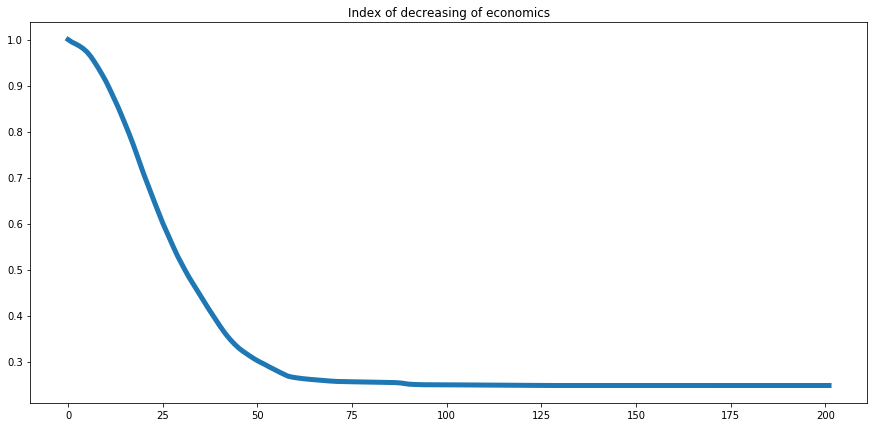

In [111]:
aa=[1]
aa.append(np.sum(mas11)/np.sum(mas1))
mas112=mas1.copy()
mas111=mas11.copy()
for el in range(200):
    mas14=np.zeros(len(mas111))
    for i in range(len(mas111)):
        if np.sum(mas1[:,i])>0:
            mas14[i]=np.sum(mas112[i])-np.sum(mas111[:,i])/np.sum(mas112[:,i])*np.sum(mas112[i])
        else:
            mas14[i]=0
    mas113=mas111.copy()
    rrr=np.array(list(range(len(mas111))))
    i=1
    for i in range(len(mas111)):
        while (mas14[i]>0) & (np.max(mas113[i])>0):
            qqq1=mas113[i]+1e10*rrr2
            ttt=np.min(qqq1[mas113[i]>0])
            tt1=rrr[mas113[i]>0][np.argmin(qqq1[mas113[i]>0])]
            if mas14[i]>mas113[i,tt1]:
                mas14[i]-=mas113[i,tt1]
                mas113[i,tt1]=0
            else:
                mas113[i,tt1]-=mas14[i]
                mas14[i]=0
    aa.append(np.sum(mas113)/np.sum(mas1))
    #print(np.sum(mas111),np.sum(mas113))
    mas112=mas111
    mas111=mas113
plt.figure(figsize=(15,7))
plt.plot(range(len(aa)),aa,linewidth=5)
plt.title('Index of decreasing of economics')
plt.show()

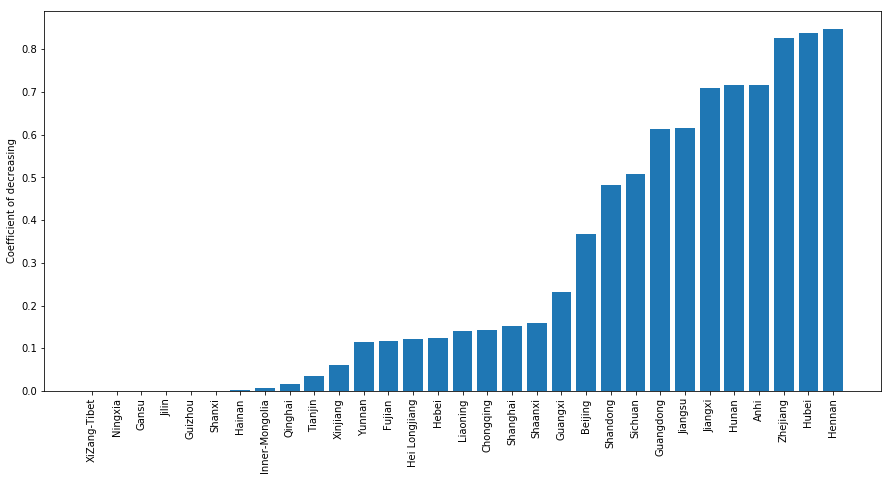

In [112]:
rrr=np.array([el // 42 for el in range(31*42)])
mas1r=[]
mas11r=[]
for el1 in range(31):
    mas1r.append([np.sum(mas1[rrr==el1,rrr==el2]) for el2 in range(31)])
    mas11r.append([np.sum(mas113[rrr==el1,rrr==el2]) for el2 in range(31)])
mas1r=np.array(mas1r)
mas11r=np.array(mas11r)
mas12r=mas11r/mas1r
res=np.array(sorted(list(zip(regions,np.sum(mas11r,axis=0)/np.sum(mas1r,axis=0))),key=lambda x: x[1]))
plt.figure(figsize=(15,7))
plt.bar(range(len(res)),np.double(res.T[1]))
plt.ylabel('Coefficient of decreasing')
plt.xticks(range(len(res)),res.T[0],rotation=90)
plt.show()

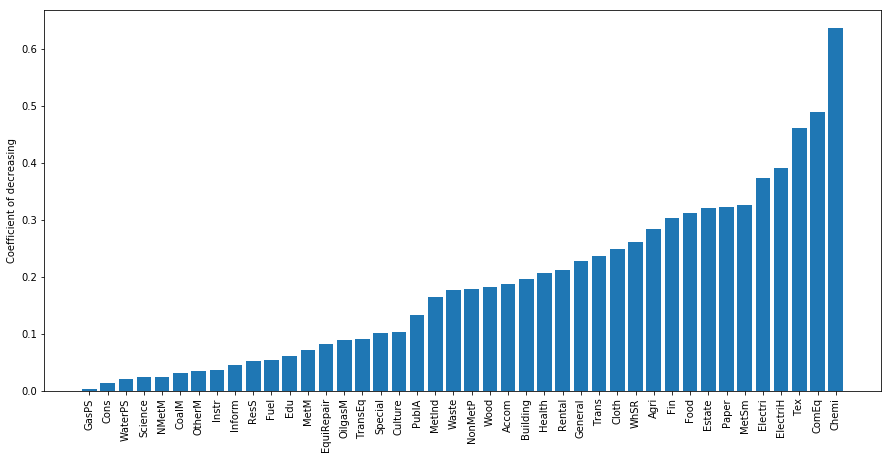

In [113]:
rrr=np.array([el % 42 for el in range(31*42)])
mas1r=[]
mas11r=[]
for el1 in range(42):
    mas1r.append([np.sum(mas1[rrr==el1,rrr==el2]) for el2 in range(42)])
    mas11r.append([np.sum(mas113[rrr==el1,rrr==el2]) for el2 in range(42)])
mas1r=np.array(mas1r)
mas11r=np.array(mas11r)
mas12r=mas11r/mas1r
res=np.array(sorted(list(zip(industries,np.sum(mas11r,axis=0)/np.sum(mas1r,axis=0))),key=lambda x: x[1]))
plt.figure(figsize=(15,7))
plt.bar(range(len(res)),np.double(res.T[1]))
plt.ylabel('Coefficient of decreasing')
plt.xticks(range(len(res)),res.T[0],rotation=90)
plt.show()

# Вывод: наименее удачный сценарий, очень сильно все пострадают

# Сценарий 4. В первую очередь будут выполнять контракты из близлежащих регионов

In [115]:
mas11=mas1.copy()
for i in range(len(mas11)):
        for j in range(len(mas11)):
            if i%42==16:
                mas11[i,j]= mas11[i,j]*0.75
            elif j%42==16:
                mas11[i,j]= mas11[i,j]*0.75
mas12=mas1-mas11
mas13=np.zeros(len(industries))
for i in range(len(mas11)):
        for j in range(len(mas11)):
            if (i%42==16) & (j%42!=16) & (mas12[i,j]>0):
                mas13[i//42]+=mas12[i,j]
for i in range(len(mas11)):
        for j in range(len(mas11)):
            if (i%42!=16) & (mas12[i,j]>0):
                tt=j//42
                if mas13[tt]>0:
                    if mas12[i,j]<mas13[tt]:
                        mas11[i,j]+=mas12[i,j]
                        mas13[tt]-=mas12[i,j]
                        mas12[i,j]=0
                    else:
                        mas11[i,j]+=mas13[tt]
                        mas12[i,j]-=mas13[tt]
                        mas13[tt]=0

In [122]:
rrr1=np.array(dfg.X)
rrr2=np.array(dfg.Y)
rrr3=np.zeros((31*42,31*42))
for i in range(31*42):
    for j in range(31*42):
        rrr3[i,j]=np.sqrt((rrr1[i//42]-rrr1[j//42])**2+(rrr2[i//42]-rrr2[j//42])**2)

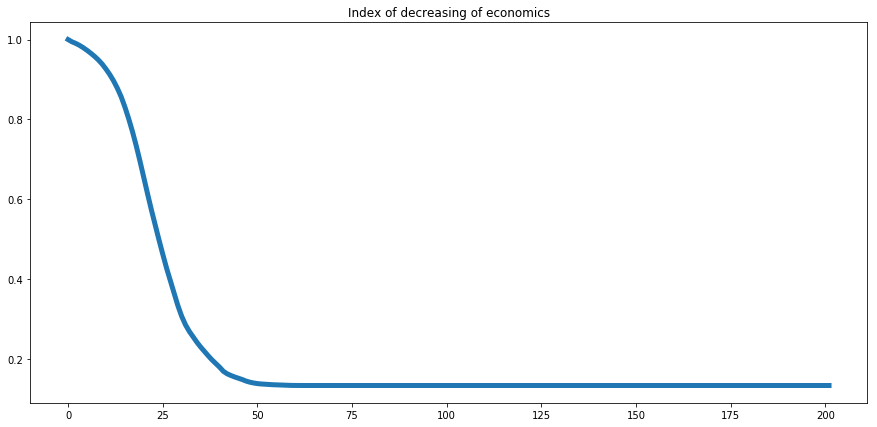

In [123]:
aa=[1]
aa.append(np.sum(mas11)/np.sum(mas1))
mas112=mas1.copy()
mas111=mas11.copy()
for el in range(200):
    mas14=np.zeros(len(mas111))
    for i in range(len(mas111)):
        if np.sum(mas1[:,i])>0:
            mas14[i]=np.sum(mas112[i])-np.sum(mas111[:,i])/np.sum(mas112[:,i])*np.sum(mas112[i])
        else:
            mas14[i]=0
    mas113=mas111.copy()
    rrr=np.array(list(range(len(mas111))))
    i=1
    for i in range(len(mas111)):
        while (mas14[i]>0) & (np.max(mas113[i])>0):
            qqq1=rrr3[i]
            ttt=np.max(qqq1[mas113[i]>0])
            tt1=rrr[mas113[i]>0][np.argmax(qqq1[mas113[i]>0])]
            if mas14[i]>mas113[i,tt1]:
                mas14[i]-=mas113[i,tt1]
                mas113[i,tt1]=0
            else:
                mas113[i,tt1]-=mas14[i]
                mas14[i]=0
    aa.append(np.sum(mas113)/np.sum(mas1))
    #print(np.sum(mas111),np.sum(mas113))
    mas112=mas111
    mas111=mas113
plt.figure(figsize=(15,7))
plt.plot(range(len(aa)),aa,linewidth=5)
plt.title('Index of decreasing of economics')
plt.show()

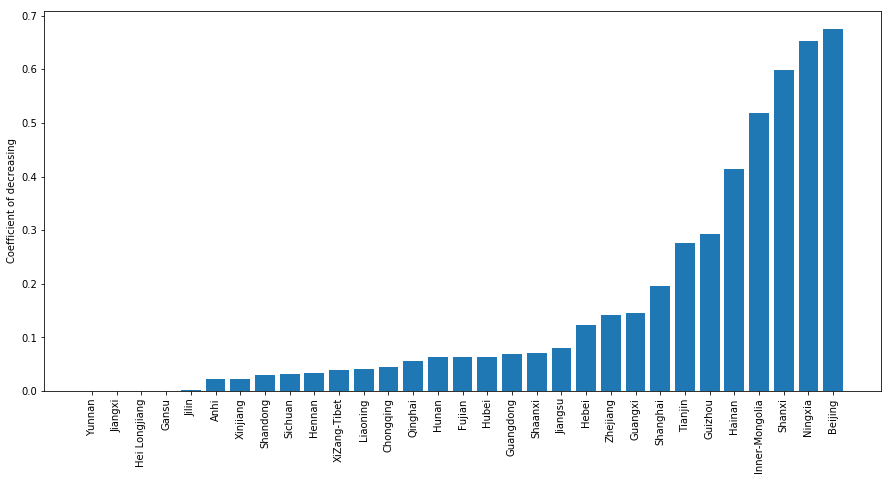

In [124]:
rrr=np.array([el // 42 for el in range(31*42)])
mas1r=[]
mas11r=[]
for el1 in range(31):
    mas1r.append([np.sum(mas1[rrr==el1,rrr==el2]) for el2 in range(31)])
    mas11r.append([np.sum(mas113[rrr==el1,rrr==el2]) for el2 in range(31)])
mas1r=np.array(mas1r)
mas11r=np.array(mas11r)
mas12r=mas11r/mas1r
res=np.array(sorted(list(zip(regions,np.sum(mas11r,axis=0)/np.sum(mas1r,axis=0))),key=lambda x: x[1]))
plt.figure(figsize=(15,7))
plt.bar(range(len(res)),np.double(res.T[1]))
plt.ylabel('Coefficient of decreasing')
plt.xticks(range(len(res)),res.T[0],rotation=90)
plt.show()

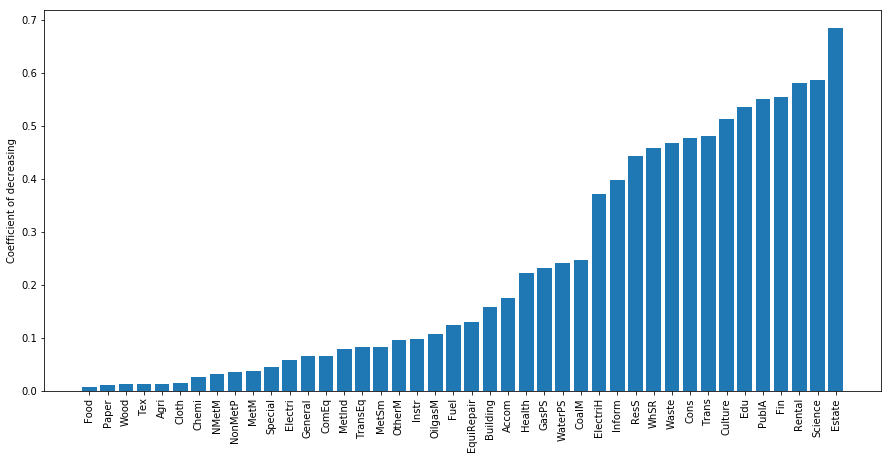

In [125]:
rrr=np.array([el % 42 for el in range(31*42)])
mas1r=[]
mas11r=[]
for el1 in range(42):
    mas1r.append([np.sum(mas1[rrr==el1,rrr==el2]) for el2 in range(42)])
    mas11r.append([np.sum(mas113[rrr==el1,rrr==el2]) for el2 in range(42)])
mas1r=np.array(mas1r)
mas11r=np.array(mas11r)
mas12r=mas11r/mas1r
res=np.array(sorted(list(zip(industries,np.sum(mas11r,axis=0)/np.sum(mas1r,axis=0))),key=lambda x: x[1]))
plt.figure(figsize=(15,7))
plt.bar(range(len(res)),np.double(res.T[1]))
plt.ylabel('Coefficient of decreasing')
plt.xticks(range(len(res)),res.T[0],rotation=90)
plt.show()

# В общем, этот сценарий еще хуже

# Ну и наконец попытаемся найти зависимость между количеством смертей на одного заболевшего и различными факторами

In [128]:
dfg.columns[1:21]

Index(['P', 'UR', 'EP/P', 'UL/P', 'HD/GDP', 'PT/P', 'TR', 'WAR', 'HW', 'TWD',
       'ESE', 'WA_P', 'GA', 'CO2/P', 'GDP', 'EC/P', 'ERE/GDP', 'TE/GDP',
       'TIEPC', 'PGR_GDP'],
      dtype='object')

In [129]:
dfg.columns

Index(['Province', 'P', 'UR', 'EP/P', 'UL/P', 'HD/GDP', 'PT/P', 'TR', 'WAR',
       'HW', 'TWD', 'ESE', 'WA_P', 'GA', 'CO2/P', 'GDP', 'EC/P', 'ERE/GDP',
       'TE/GDP', 'TIEPC', 'PGR_GDP', 'Illness', 'Died', 'Proc_D', 'X', 'Y'],
      dtype='object')

In [134]:
from sklearn.preprocessing import StandardScaler as SS
norm_df=SS().fit_transform(dfg[dfg.columns[1:21]])

In [149]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.004).fit(norm_df,dfg.Proc_D)

In [151]:
list(zip(np.array(dfg.columns[1:21])[np.abs(ls.coef_)>0.00001],ls.coef_[np.abs(ls.coef_)>0.00001]))

[('HW', 0.021949469080326342),
 ('CO2/P', 0.00020248368640354578),
 ('ERE/GDP', 0.0016433496615538027)]

In [153]:
dfg1=pd.DataFrame(norm_df,columns=dfg.columns[1:21])
dfg1['Proc_D']=dfg.Proc_D
dfg1.head()

,P,UR,EP/P,UL/P,HD/GDP,PT/P,TR,WAR,HW,TWD,...,WA_P,GA,CO2/P,GDP,EC/P,ERE/GDP,TE/GDP,TIEPC,PGR_GDP,Proc_D
0,-0.812434,-3.011046,0.802770,0.567757,-0.659364,2.589636,2.717104,-0.254298,-0.585724,-0.485806,...,-0.268769,-0.581057,3.146886,2.329462,-0.411833,1.056460,-0.565983,5.434768,2.221051,0.019512
1,-1.037424,0.330531,-2.286188,1.040446,-0.484305,-0.346822,-0.349400,-0.677763,-0.568063,-0.430099,...,-0.238849,-0.592726,1.473086,2.393270,0.452599,0.958984,-0.618491,0.020530,0.195975,0.022059
2,1.083477,0.488899,-0.300737,-0.649295,0.738151,-1.187330,-1.192240,-0.543989,-0.096803,0.782478,...,-0.262476,-0.369005,0.086246,-0.559487,0.330672,-0.695617,1.563157,-0.188452,-0.783900,0.018868
3,-0.273503,0.346367,-0.940866,-0.846453,0.676717,-1.163607,-1.030845,-0.369188,-0.435663,-0.070780,...,0.278028,-0.342608,0.273644,-0.792214,0.571482,-0.332610,3.298226,-0.081632,0.261300,0.000000
4,-0.689559,0.568083,-0.742560,0.234082,-1.621437,-1.338609,-1.335702,1.642972,0.274331,-0.417113,...,-0.255162,2.996765,1.222130,0.785750,1.679587,-0.529218,-0.697095,-0.179802,-0.283075,0.013333


In [154]:
dfg1.columns

Index(['P', 'UR', 'EP/P', 'UL/P', 'HD/GDP', 'PT/P', 'TR', 'WAR', 'HW', 'TWD',
       'ESE', 'WA_P', 'GA', 'CO2/P', 'GDP', 'EC/P', 'ERE/GDP', 'TE/GDP',
       'TIEPC', 'PGR_GDP', 'Proc_D'],
      dtype='object')

In [155]:
dfg1.columns=['P', 'UR', 'EP/P', 'UL/P', 'HD/GDP', 'PT/P', 'TR', 'WAR', 'HW', 'TWD',
       'ESE', 'WA_P', 'GA', 'CO2_P', 'GDP', 'EC/P', 'ERE_GDP', 'TE/GDP',
       'TIEPC', 'PGR_GDP', 'Proc_D']

In [156]:
m1 = smf.ols('Proc_D ~ CO2_P + HW + ERE_GDP',data=dfg1)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 Proc_D   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     25.17
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           5.58e-08
Time:                        01:38:57   Log-Likelihood:                 87.049
No. Observations:                  31   AIC:                            -166.1
Df Residuals:                      27   BIC:                            -160.4
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0138      0.003      4.924      0.0